<a href="https://colab.research.google.com/github/yukinaga/minnano_dl/blob/main/section_2/03_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークの実装
シンプルなニューラルネットワークを、Pythonのコードで実装します。

## ニューラルネットワークの実装
Pythonのクラスを使って、ニューラルネットワークを実装します。  
以下のコードでは、`NeuralNetwork`クラスを使って、ニューラルネットワークをクラスとして実装しています。  
このクラスには、初期化のための`__init__`メソッド、ニューロンを表す`neuron`メソッド、ニューラルネットワーク全体の処理が行われる`__call__`メソッドが実装されます。  
`__init__`メソッド、`__call__`メソッドについては、「python_basic_4.ipynb」に解説があります。


In [1]:
import numpy as np
import matplotlib.pyplot as plt  # グラフの表示に使用

class NeuralNetwork():
    def __init__(self, N, W, B):  # 初期化
        self.params = [N, W, B]  # 各パラメータをまとめる

    def neuron(self, x, w, b):  # ニューロンを表す関数
        u = np.sum(x*w) - b
        y = 0 if u < 0 else 1
        return y

    def __call__(self, x):  # NN全体の処理
        N, W, B = self.params  # 各パラメータを取り出す

        for i in range(len(N)):  # 各層の処理
            n = N[i]  # 層のニューロン数
            y= np.zeros(n)  # 出力を格納する配列
            for j in range(n):  # 各ニューロンごとに
                w = W[i][j]  # 重み
                b = B[i][j]  # バイアス
                y[j] = self.neuron(x, w, b)
            x = y  # 次の層の入力
        return y  # NN全体の出力

In [2]:
# 練習用


## ニューラルネットワークを使用する
ニューラルネットワークの、様々な入力に対する反応を確認します。  
以下のコードは2つの入力を用意し、それぞれを変化させてニューラルネットワークに入力し、出力を確認します。  
出力は2次元配列に格納し、ライブラリmatplotlibを使って画像として表示します。




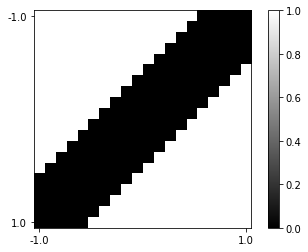

In [3]:
steps = 20  # 入力を変化させるステップ数
r = 1.0  # 入力を変化させる範囲（-1から1まで）

X1 = np.linspace(-r, r, steps)  # 入力1
X2 = np.linspace(-r, r, steps)  # 入力2
image = np.zeros((steps, steps))  # 出力を格納する2次元配列

N = [2, 1]  # 各層のニューロン数（中間層:2、出力層:1）
W = [  # 重み
     np.array([[4.0, 4.0], [4.0, 4.0]]),
     np.array([[1.0, -1.0]])
     ]
B = [  # バイアス
     np.array([2.0, -2.0]),
     np.array([-0.5])
     ]

neural_network = NeuralNetwork(N, W, B)  # NNのインスタンス

for i_1 in range(steps):  # 入力1を変化させる
    for i_2 in range(steps):  # 入力2を変化させる
        X = np.array([X1[i_1], X2[i_2]])  # 入力
        image[i_1, i_2] = neural_network(X)  # 出力を配列に格納

plt.imshow(image, "gray", vmin=0.0, vmax=1.0)  # 配列を画像として表示
plt.colorbar()
plt.xticks([0, steps-1], [-r, r])  # x軸ラベルの表示
plt.yticks([0, steps-1], [-r, r])  # y軸ラベルの表示
plt.show()

In [4]:
# 練習用


重みやバイアスの値の変化が、結果にどのような影響を与えるのか確認してみましょう。